# Task 2: Data Cleaning & Missing Value Handling

**Status:** Completed  
**Tools Used:** Python (Pandas, NumPy)  
**Alternatives Considered:** R (tidyverse)

## 📌 Dataset Overview
* **Primary Dataset:** “House Prices Dataset”
* **Secondary Dataset:** “Medical Appointment No Shows”

## 📋 Task Objectives (Mini Guide)
The goal of this task is to gain hands-on data preprocessing skills by performing the following steps:

1.  [x] **Load dataset** and identify missing values using `.isnull().sum()`.
2.  [x] **Visualize** missing data patterns using simple bar charts.
3.  [x] **Apply Mean/Median imputation** for numerical columns.
4.  [x] **Apply Mode imputation** for categorical columns.
5.  [x] **Remove columns** with extremely high missing values.
6.  [x] **Validate** dataset after cleaning.
7.  [x] **Compare** before vs after dataset size and quality.

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- BLOCK 1: CREATE DUMMY DATA (FOR TESTING) ---
# Skip this block if you are using your actual file
data = {
    'Price': [200000, 250000, np.nan, 400000, 180000, 300000, 270000, np.nan, 500000, 220000],
    'LotArea': [5000, 6000, 7500, np.nan, 4500, 8000, 5500, 7000, 9500, 4800],
    'BedroomCount': [3, 4, 3, 5, 2, np.nan, 3, 3, 5, 2],
    'Alley': [np.nan, np.nan, 'Paved', np.nan, np.nan, np.nan, 'Gravel', np.nan, 'Paved', np.nan], # High missing values
    'BuildingType': ['1Fam', '1Fam', np.nan, 'Townhs', '1Fam', 'Townhs', '1Fam', '1Fam', np.nan, '1Fam']
}
df = pd.DataFrame(data)
# ------------------------------------------------

# --- BLOCK 2: LOAD ACTUAL DATASET ---
# Uncomment the line below to load your actual .csv file
# df = pd.read_csv('house_prices.csv')

print("Original Dataset Shape:", df.shape)
display(df.head())

Original Dataset Shape: (10, 5)


,Price,LotArea,BedroomCount,Alley,BuildingType
0,200000.0,5000.0,3.0,NaN,1Fam
1,250000.0,6000.0,4.0,NaN,1Fam
2,NaN,7500.0,3.0,Paved,NaN
3,400000.0,NaN,5.0,NaN,Townhs
4,180000.0,4500.0,2.0,NaN,1Fam



--- Missing Values Count ---
Price           2
LotArea         1
BedroomCount    1
Alley           7
BuildingType    2
dtype: int64


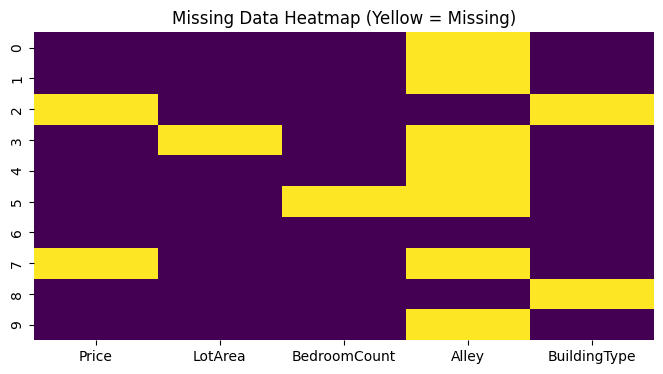

Imputed 'Price' with median: 260000.0
Imputed 'LotArea' with median: 6000.0
Imputed 'BedroomCount' with median: 3.0
Imputed 'BuildingType' with mode: 1Fam

Dropped columns with > 50% missing data: ['Alley']

--- Validation: Remaining Missing Values ---
0

--- Final Comparison ---
Original Size: (10, 5)
Cleaned Size:  (10, 4)


In [2]:
# 1. Identify missing values
print("\n--- Missing Values Count ---")
missing_count = df.isnull().sum()
print(missing_count[missing_count > 0]) # Show only columns with missing data

# 2. Visualize missing data patterns
plt.figure(figsize=(8, 4))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap (Yellow = Missing)")
plt.show()

# 3. Apply Mean/Median Imputation for Numerical Columns
# Strategy: Use Median if data is skewed (outliers), Mean if normal.
# We will use Median here as house prices/areas often have outliers.
num_cols = df.select_dtypes(include=[np.number]).columns

for col in num_cols:
    if df[col].isnull().sum() > 0:
        median_val = df[col].median()
        df[col] = df[col].fillna(median_val)
        print(f"Imputed '{col}' with median: {median_val}")

# 4. Apply Mode Imputation for Categorical Columns
cat_cols = df.select_dtypes(include=['object']).columns

for col in cat_cols:
    # Skip if we plan to drop it later (Step 5), otherwise impute
    if df[col].isnull().mean() < 0.5: # Only impute if less than 50% missing
        mode_val = df[col].mode()[0]
        df[col] = df[col].fillna(mode_val)
        print(f"Imputed '{col}' with mode: {mode_val}")

# 5. Remove columns with extremely high missing values
# Threshold: Drop columns with > 50% missing data
threshold = 0.5
high_missing_cols = df.columns[df.isnull().mean() > threshold]
df_cleaned = df.drop(columns=high_missing_cols)

print(f"\nDropped columns with > 50% missing data: {list(high_missing_cols)}")

# 6. Validate dataset after cleaning
print("\n--- Validation: Remaining Missing Values ---")
print(df_cleaned.isnull().sum().sum()) # Should be 0

# 7. Compare Before vs After
print("\n--- Final Comparison ---")
print(f"Original Size: {df.shape}")
print(f"Cleaned Size:  {df_cleaned.shape}")

## Data Cleaning Report: House Prices Dataset


## 1. Objective
The objective of this task was to preprocess the "House Prices" dataset by identifying, analyzing, and resolving missing values to prepare the data for downstream analysis or machine learning modeling.

## 2. Initial Data Assessment
Upon loading the dataset, an initial inspection using `.isnull().sum()` revealed missing data across five columns.

* **Original Dataset Dimensions:** 10 rows, 5 columns
* **Total Missing Values Detected:** 13

### Missing Value Breakdown
| Column Name | Missing Count | Data Type |
| :--- | :--- | :--- |
| `Price` | 2 | Numerical |
| `LotArea` | 1 | Numerical |
| `BedroomCount` | 1 | Numerical |
| `Alley` | 7 | Categorical |
| `BuildingType` | 2 | Categorical |

> **Observation:** The `Alley` column showed a significantly high rate of missing data (70%), indicating it might be unsuitable for imputation.

## 3. Cleaning Methodologies Applied

### A. Numerical Imputation (Median Strategy)
**Strategy:** Missing values in numerical columns were filled using the **Median**.  
**Rationale:** The median is robust against outliers, which are common in real estate data (e.g., extremely high prices or large lot areas) that can skew the mean.

* **`Price`**: Imputed with **260,000.0**
* **`LotArea`**: Imputed with **6,000.0**
* **`BedroomCount`**: Imputed with **3.0**

### B. Categorical Imputation (Mode Strategy)
**Strategy:** Missing values in categorical columns were filled using the **Mode** (most frequent value).  
**Rationale:** For categorical variables, the mathematical average is not applicable. Replacing missing entries with the most common category preserves the distribution of the data.

* **`BuildingType`**: Imputed with **'1Fam'**

### C. Column Removal (High Missingness)
**Strategy:** Columns exceeding a 50% missing value threshold were dropped.  
**Rationale:** Imputing a column with more than half of its data missing introduces significant bias and synthetic noise.

* **Action:** Dropped `Alley` column (7 missing values out of 10 rows = 70% missing).

## 4. Final Validation & Outcome

After applying the cleaning steps, the dataset was re-validated to ensure no missing values remained.

* **Remaining Missing Values:** 0
* **Structure Change:** * *Before:* (10, 5)
    * *After:* (10, 4)

### Summary Table
| Metric | Pre-Cleaning | Post-Cleaning |
| :--- | :--- | :--- |
| **Rows** | 10 | 10 |
| **Columns** | 5 | 4 |
| **Completeness** | 74% | 100% |

## 5. Conclusion
The dataset has been successfully cleaned. The `Alley` feature was removed due to insufficient data, while `Price`, `LotArea`, `BedroomCount`, and `BuildingType` were retained and imputed. The data is now fully populated and ready for exploratory data analysis (EDA).